##  COMP24112 Lab 2: News Article Classification by k-NN

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.stats
from tqdm.notebook import tqdm
from google.colab import drive
drive.mount('/content/drive')
# tqdm gives you a progress bar for loop execution

data, labels, class_names, vocabulary = np.load(
    "/content/drive/My Drive/1_code/1_datasets/ReutersNews_4Classes_sparse.npy", allow_pickle=True
)


# 800 samples, 6248 features (how many times a word appears in a document)
# data - 800 rows, 6428 columns sparse matrix; [i] row for a single i-th article,
# [i,j] element for how many times the j-th word is contained within that article.
# labels - np.array of 800 length, constains which of the 4 classes the ith article is classified as
# class_names - np array of 4 strings each of which are one of the 4 class names for articles
# vocabulary - np array of 6428 length, with exact strings for 6428 words


Mounted at /content/drive


## 3. k-NN Implementation (4 Marks, Normal)

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance (defined as 1 - cosine similarity). It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to get 4 marks, you are asked to implement the k-NN classifier from scrach without relying on any machine learning library, particularly the distance calculation. But you are allowed to research NumPy functions relating to sorting. If you decide to use existing distance implementation from libraries, e.g., `sklearn.metrics.pairwise_distances` imported as `cdist`, you can get at most 3 marks.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

## Functions for exp. 1 and 2:

In [2]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)


find_euclidean_distance = lambda A, B: np.sqrt(
    np.sum(A**2, axis=1)[:, np.newaxis] + np.sum(B**2, axis=1) - 2 * np.dot(A, B.T)
)

find_cosine_distance = lambda A, B: 1 - np.dot(A, B.T) / (
    np.sqrt(np.sum(A**2, axis=1))[:, np.newaxis]
    * np.sqrt(np.sum(B**2, axis=1))[np.newaxis, :]
)


def train_test_split(n_train, dataset=data, full_labels=labels):
    """
    Replication of train_test_split from sklearn.model_selection.
    Randomly selects n_train articles for training using sample_indices,
    the rest for testing, and returns corresponding data and label arrays.
    
    n_train: int, number of articles to be selected in each class for training
    """
    train_indices = sample_indices(full_labels, n_train, n_train, n_train, n_train)
    test_indices = np.delete(np.arange(0, len(full_labels)), train_indices)
    train = dataset[train_indices, :].toarray()
    test = dataset[test_indices, :].toarray()
    train_labels = full_labels[train_indices]
    test_labels = full_labels[test_indices]
    return train, test, train_labels, test_labels


def knn_classify(train, test, train_labels, k=1, metric="euclidean"):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels and the specified format.
    
    train: An n x d matrix consisting of n training samples, each with d features.
    test: An m x d matrix of m samples to classify, each with d features.
    train_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    k: The number of nearest neighbours to use for classification.
    metric: The metric to use for calculating distances between samples.

    Returns: A vector of size m, where out[i] is the predicted class index of test_samples[i].
    
    """
    if metric == "euclidean":
        pairwise_distance = find_euclidean_distance(test, train)
    elif metric == "cosine":
        pairwise_distance = find_cosine_distance(test, train)
    sorted_indices = (np.argsort(pairwise_distance, axis=1))[:, :k]
    mode_labels = scipy.stats.mode(train_labels[sorted_indices], axis=1)[0][:, 0]
    return mode_labels


find_accuracy = lambda found_labels, ground_truth: np.count_nonzero(
    found_labels == ground_truth
) / len(ground_truth)

## 4. Experiments (12 Marks in Total)

Use your k-NN function to perform the following experiments.

### Experiment 1 (4 Marks, Easy)

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Fix a neighbour number setting as you see fit. Perform k-NN classification using the Euclidean distance and test it.

Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies. Print out the mean and standard deviation.

In [3]:
%%time

accuracies = np.array([])

for i in tqdm(range(20)):
    train, test, train_labels, test_labels = train_test_split(80)
    found_labels = knn_classify(train, test, train_labels)
    accuracies = np.append(
        accuracies, find_accuracy(found_labels, test_labels))

print(
    "With Euclidean distance and 20 iterrations, mean accuracy is {0:.3f} with std. {1:.3f}.".format(
        np.mean(accuracies), np.std(accuracies)
    )
)

  0%|          | 0/20 [00:00<?, ?it/s]

With Euclidean distance and 20 iterrations, mean accuracy is 0.889 with std. 0.020.
CPU times: user 27.6 s, sys: 92.8 ms, total: 27.7 s
Wall time: 29.1 s


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

Print out the mean and standard deviation.

In [ ]:
%%time

accuracies = np.array([])

for i in tqdm(range(20)):
    train, test, train_labels, test_labels = train_test_split(80)
    found_labels = knn_classify(
        train, test, train_labels, metric="cosine"
    )
    accuracies = np.append(
        accuracies, find_accuracy(found_labels, test_labels)
    )
print(
    "With Cosine distance and 20 iterrations, mean accuracy is {0:.3f} with std. {1:.3f}.".format(
        np.mean(accuracies), np.std(accuracies)
    )
)

  0%|          | 0/20 [00:00<?, ?it/s]

With Cosine distance and 20 iterrations, mean accuracy is 0.964 with std. 0.006.
CPU times: total: 9.33 s
Wall time: 9.34 s


Explain in your report which distance measure gives better performance and analyse the reason. 

### Experiment 2 (4 Marks, Easy)

Using the distance measure that you found performs better in Experiment 1.

Randomly select 80 articles per class for training, and use the remaining articles for testing. Perform k-NN classification with the neighbour number $k$ varying from 1 to 50.

For each values of $k$, repeat the training process by 20 trials and record the average training error rates and standard deviation.

Do the same for testing errors.

In [ ]:
%%time

# It doesn't make sense to have an even number of k, but having asked the TA I kept it

K_RANGE_START = 1
K_RANGE_END = 51
K_RANGE_STEP = 1

k_range = np.arange(K_RANGE_START, K_RANGE_END, K_RANGE_STEP)

errors_const_k_train = np.array([])
errors_const_k_test = np.array([])

stdevs_const_k_train = np.array([])
stdevs_const_k_test = np.array([])

for i in tqdm(k_range):
    errors_train = np.array([])
    errors_test = np.array([])
    for j in range(20):
        train, test, train_labels, test_labels = train_test_split(80)
        found_labels_train = knn_classify(train, train, train_labels, k=i, metric="cosine")
        found_labels_test = knn_classify(train, test, train_labels, k=i, metric="cosine")
        errors_train = np.append(errors_train, 1 - find_accuracy(found_labels_train, train_labels))
        errors_test = np.append(errors_test, 1 - find_accuracy(found_labels_test, test_labels))
    errors_const_k_train = np.append(errors_const_k_train, np.mean(errors_train))
    errors_const_k_test = np.append(errors_const_k_test, np.mean(errors_test))
    stdevs_const_k_train = np.append(stdevs_const_k_train, np.std(errors_train))
    stdevs_const_k_test = np.append(stdevs_const_k_test, np.std(errors_test))

# save for Result analysis
exp_2_k_range = k_range
exp_2_test_errors = errors_const_k_test
exp_2_n_test = len(test_labels)

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: total: 12min 37s
Wall time: 12min 38s


Produce an error bar plot showing the training error rate for each $k$ here:

Text(0, 0.5, 'Error')

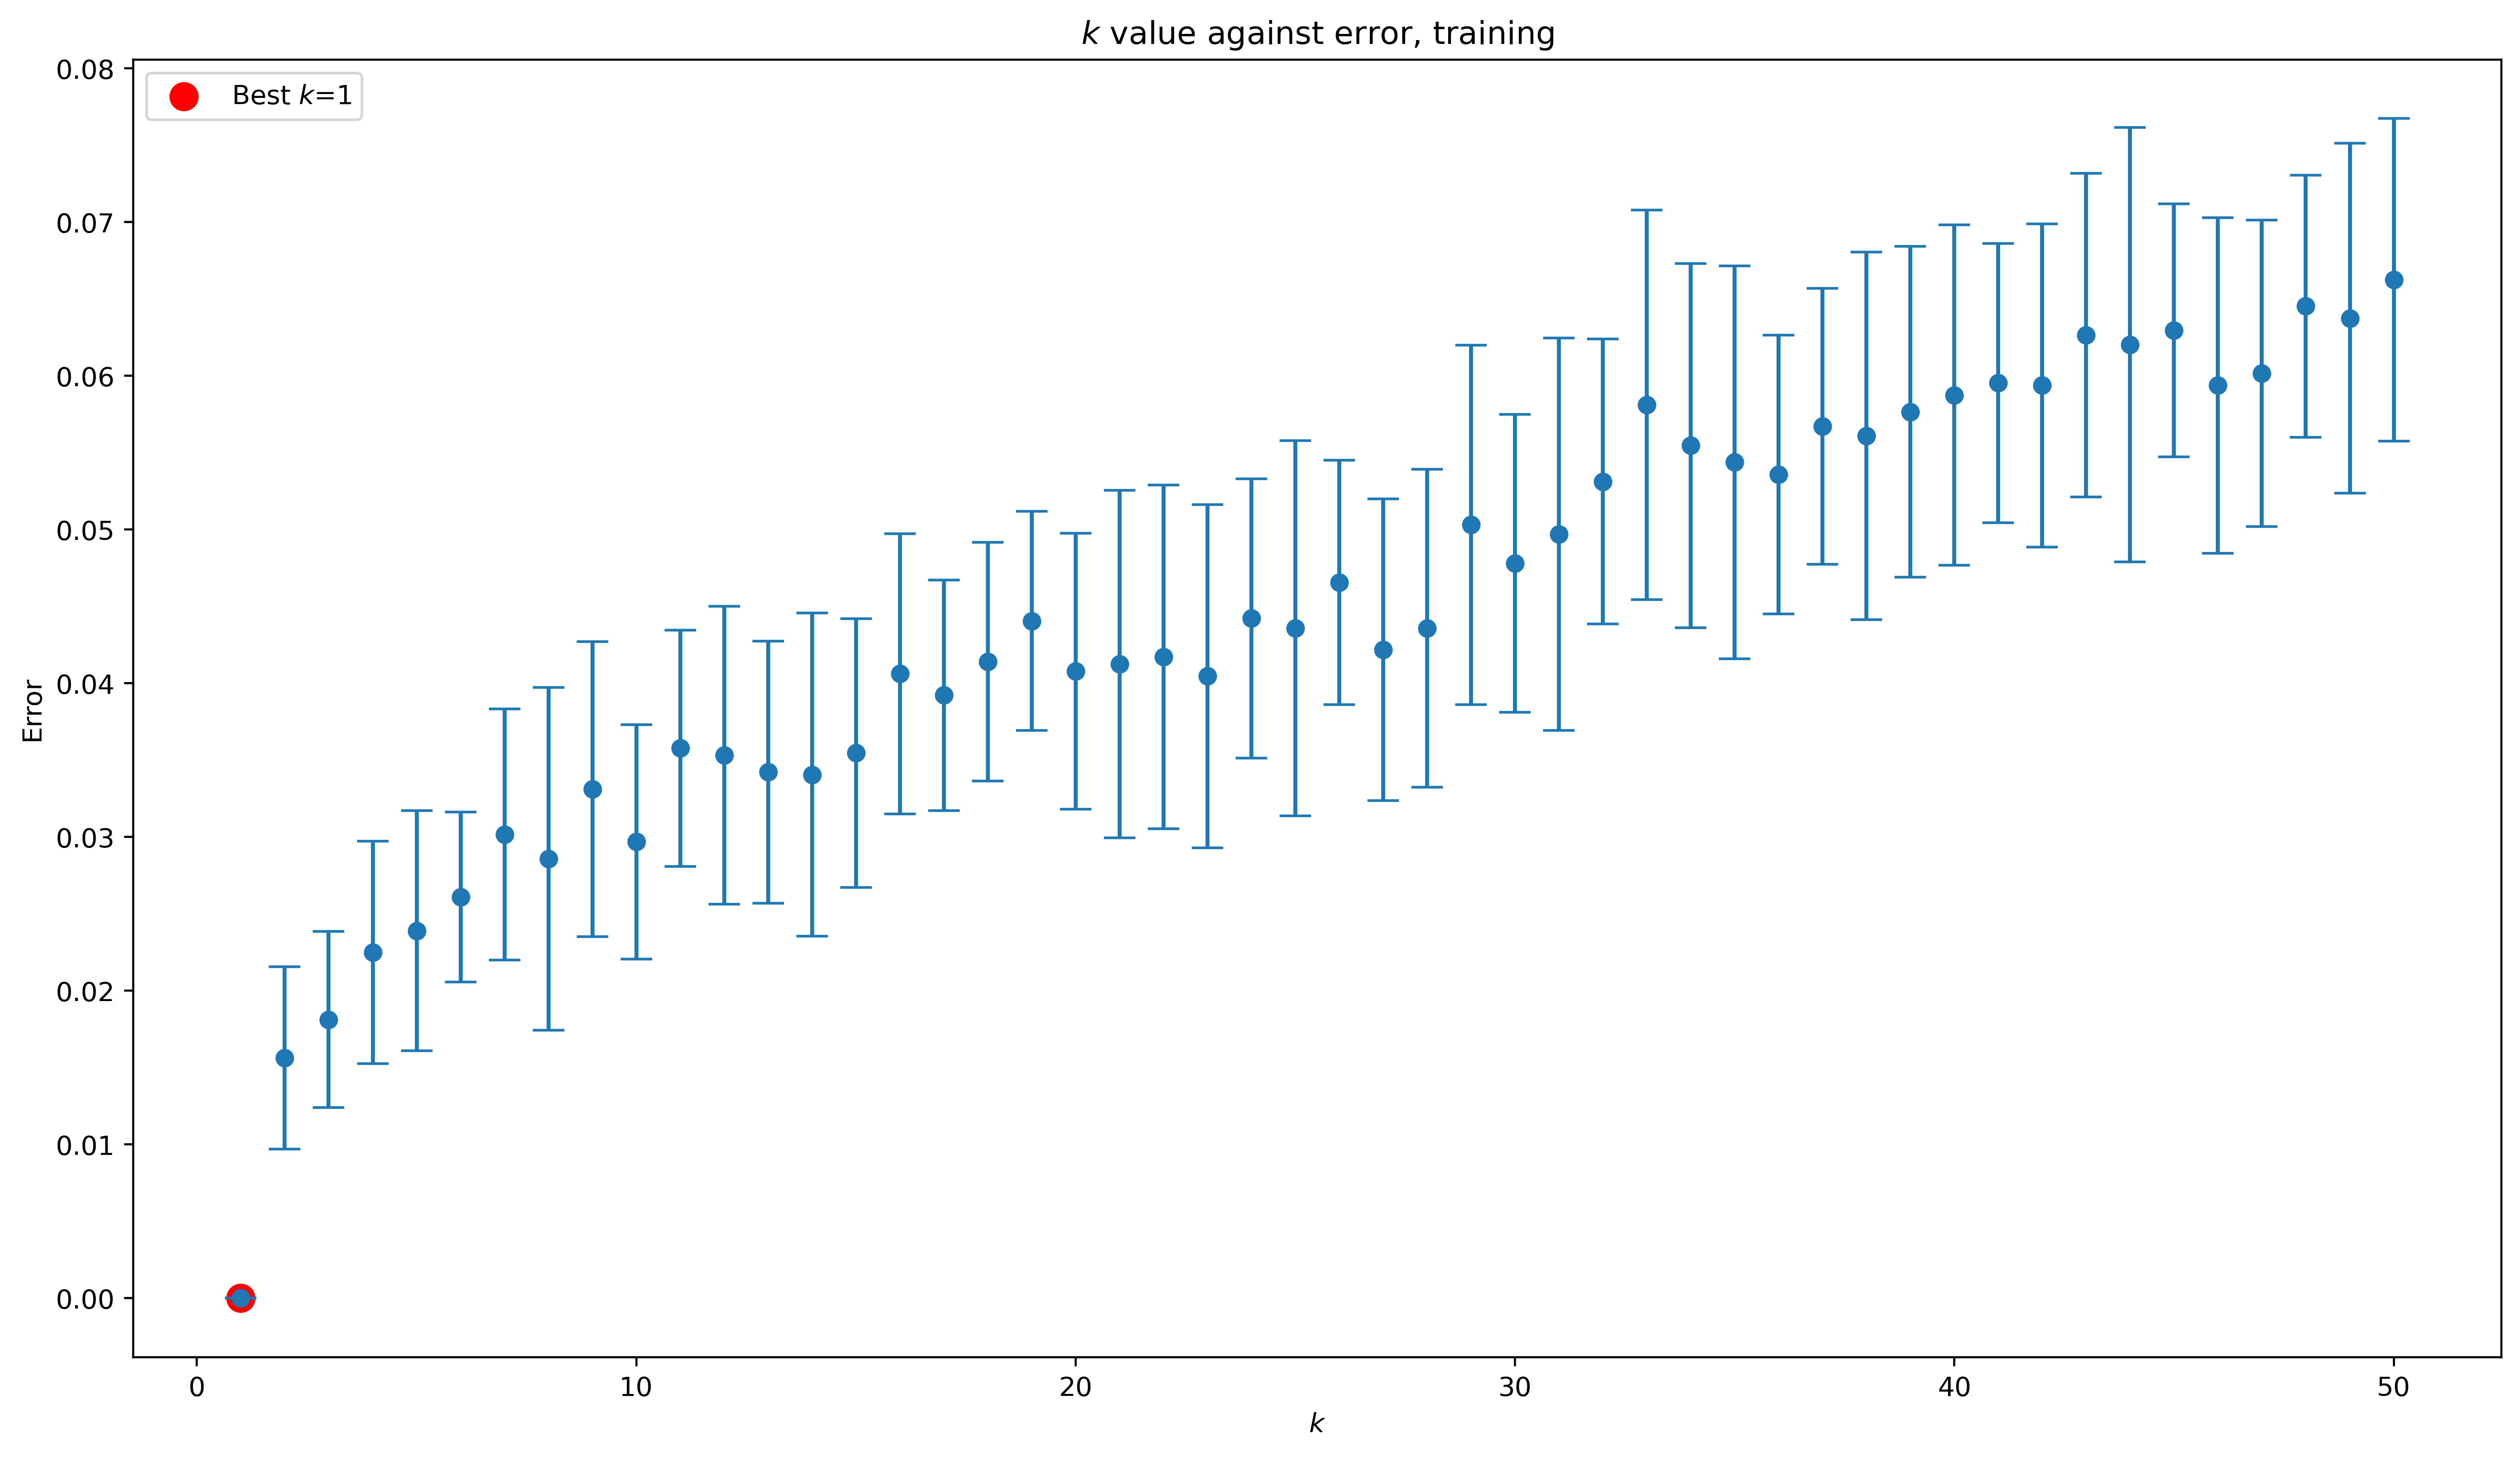

In [ ]:
best_k_index = np.argmin(errors_const_k_train)
best_k = k_range[best_k_index]

fig = plt.figure(figsize=(16,9), dpi=400)
ax = fig.add_subplot(111)

ax.errorbar(k_range, errors_const_k_train, stdevs_const_k_train, fmt="o", capsize = 6)
ax.scatter(best_k, errors_const_k_train[best_k_index], label=r"Best $k$="+str(best_k), c='r', s=100)

ax.set_title(r"$k$ value against error, training")
ax.set_xlabel(r"$k$")
ax.legend(loc = 'best')
ax.set_ylabel("Error")


Produce your testing error bar plot here:

Text(0, 0.5, 'Error')

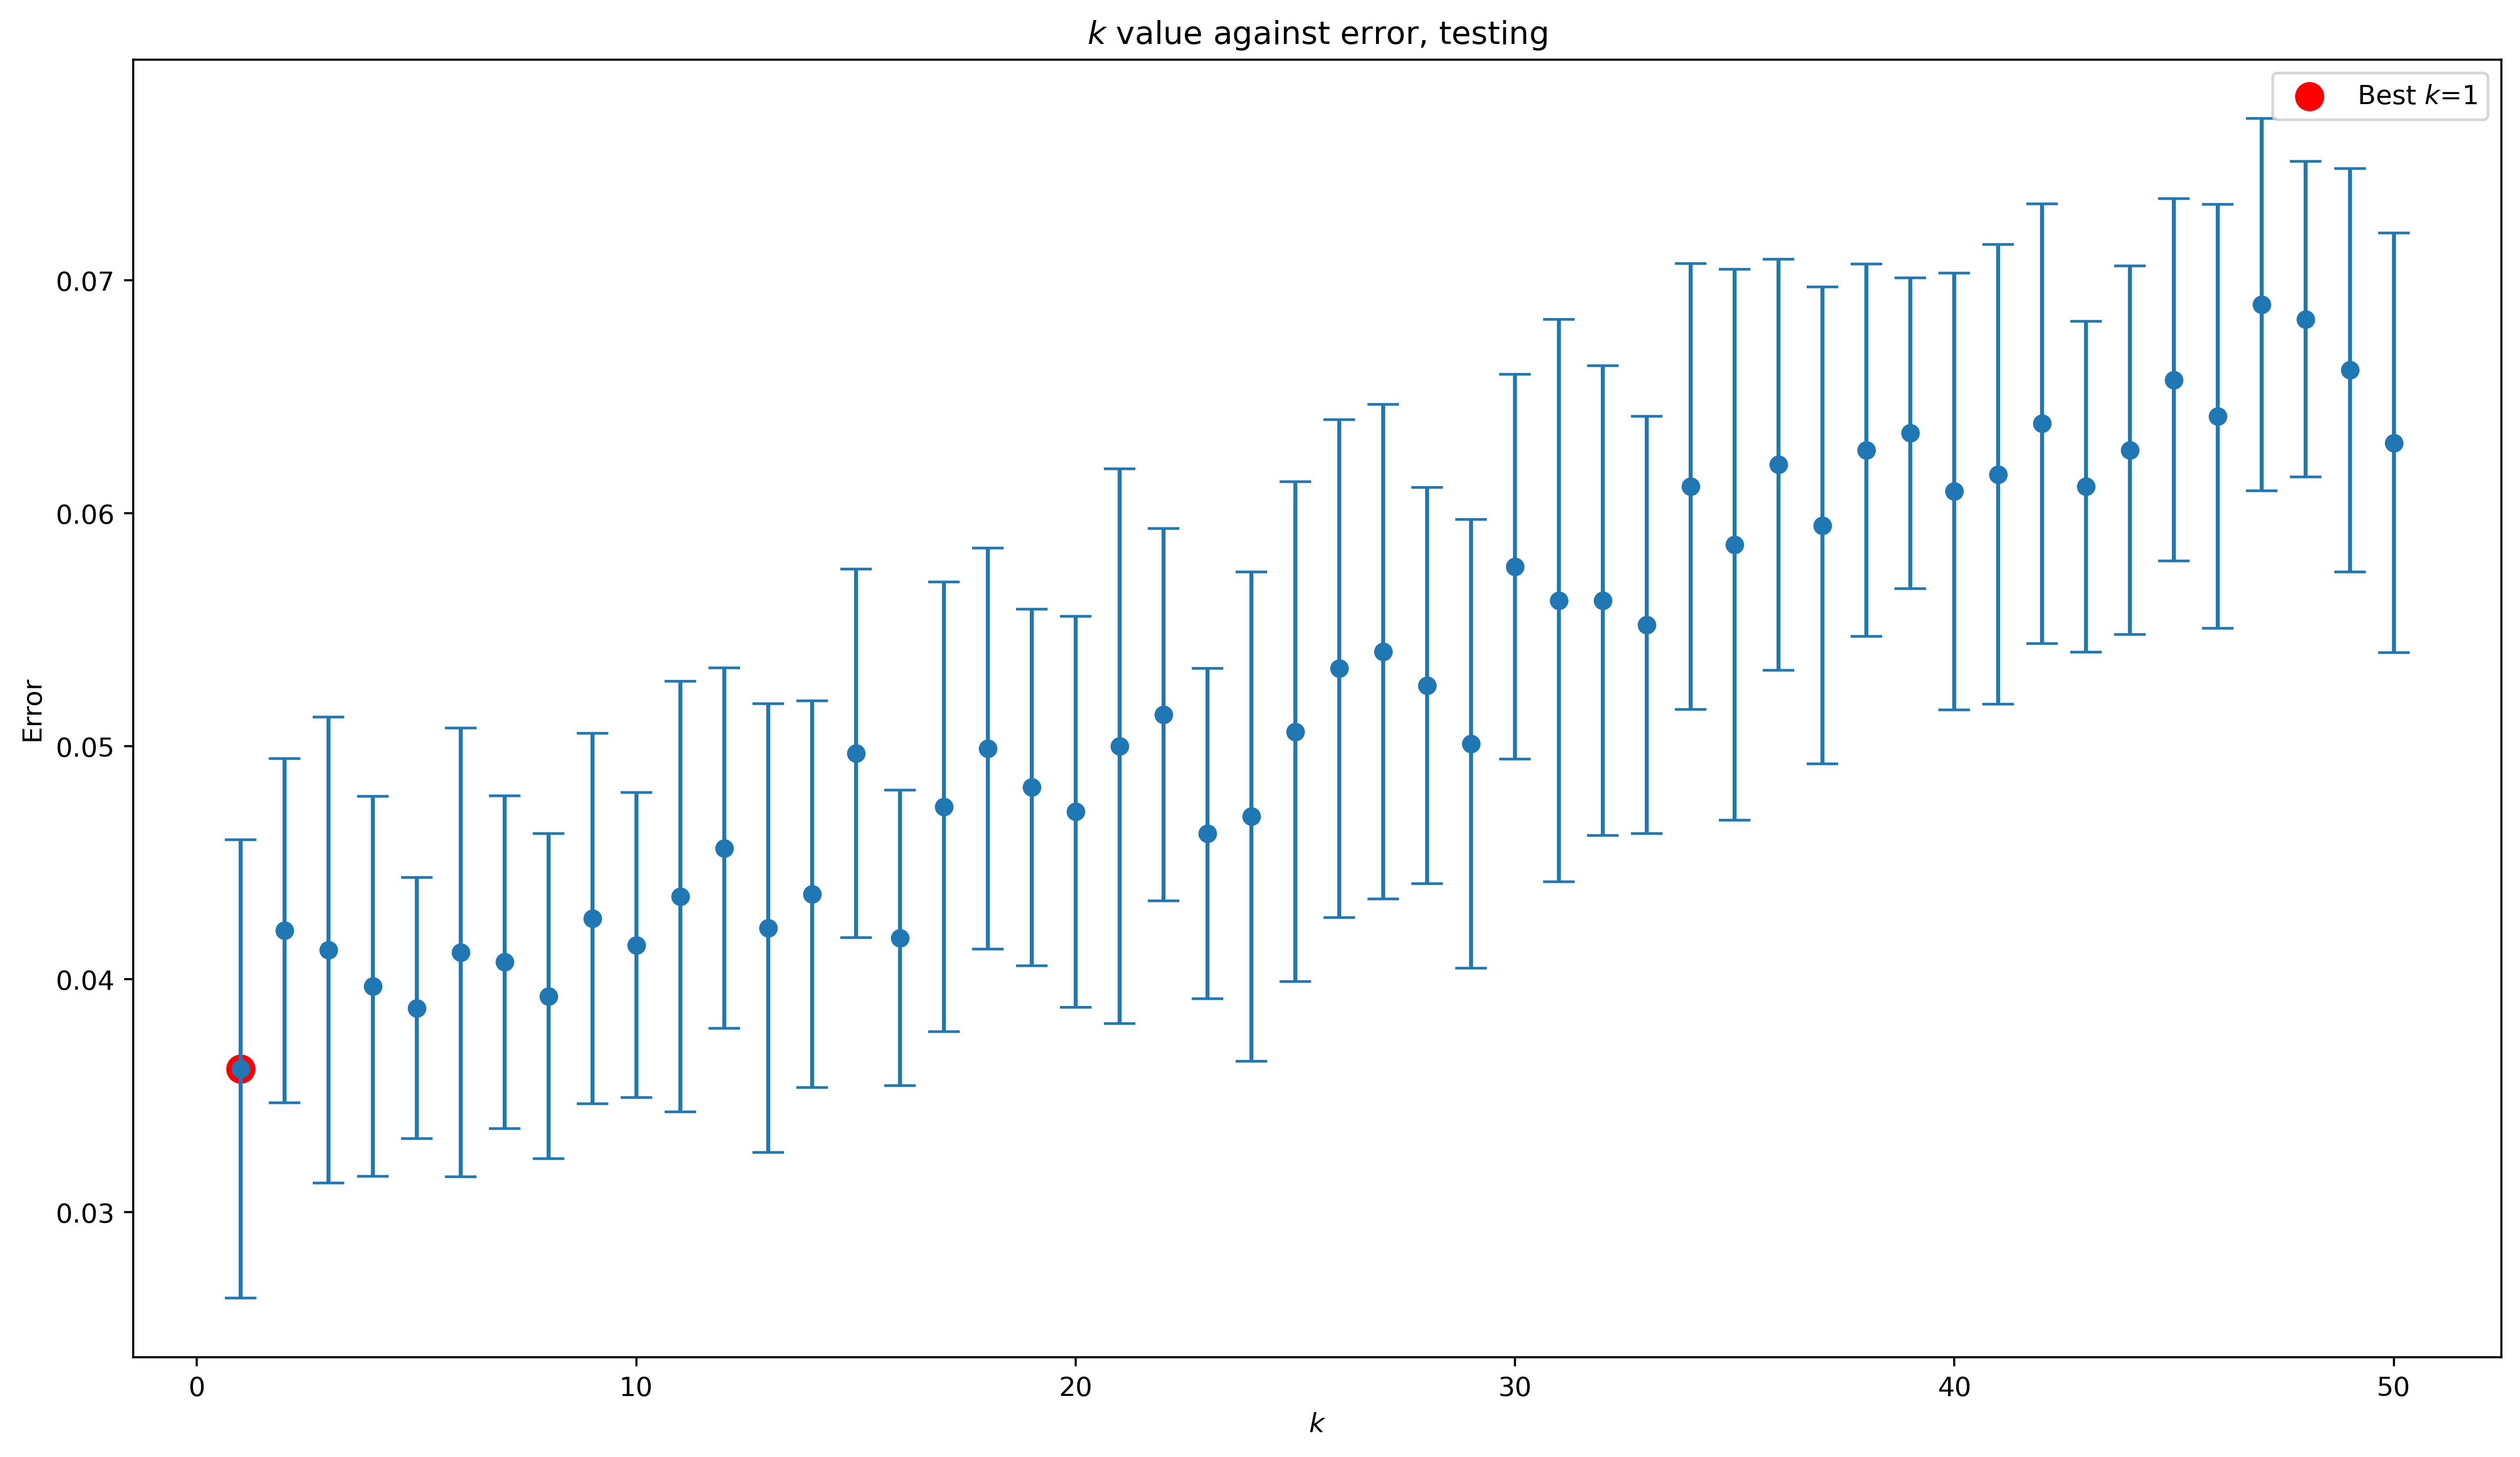

In [ ]:
best_k_index = np.argmin(errors_const_k_test)
best_k = k_range[best_k_index]

fig = plt.figure(figsize=(16,9), dpi=400)
ax = fig.add_subplot(111)

ax.errorbar(k_range, errors_const_k_test, stdevs_const_k_test, fmt="o", capsize = 6)
ax.scatter(best_k, errors_const_k_test[best_k_index], label=r"Best $k$="+str(best_k), c='r', s=100)

ax.set_title(r"$k$ value against error, testing")
ax.set_xlabel(r"$k$")
ax.legend(loc = 'best')
ax.set_ylabel("Error")


**Remember that all graphs should have axis labels and a title.**

Discuss in your report the difference between the training and testing accuracies and its indication. Analyse in your report the effect of $k$ based on this experiment. 

### Experiment 3 (4 Marks, Normal)

Compare three 5-NN classifiers using cosine distance. In order to get 4 marks, you should implement the confusion matrix calculation from scrach yourself. If you decide to use existing implementation for confusion matrix calculation, you can get at most 3 marks.

First, randomly select 100 articles per class and keep these as your testing samples. Set all the remaining articles as the training set.

Then do the following:

(1) Train the first classifier using the training set.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the numbers of the training and testing samples belonging to each class, the $2\times 2$ confusion matrix for each of the 4 classes, and the overall accuracy of the classifier.

### Functions for exp. 3:

In [ ]:
def print_confusion_matrix(
    found_labels, ground_truth, index, full_class_names=class_names
):
    """
    Prints a 2x2 confusion matrix for a specific class given the predicted label array,
    the ground truth label array, and the index of the class.    
    """
    true_positives = np.count_nonzero(
        np.in1d(
            (np.where(found_labels == index)[0]), (np.where(ground_truth == index)[0])
        )
    )
    false_positives = np.count_nonzero(
        np.in1d(
            (np.where(found_labels == index)[0]), (np.where(ground_truth != index)[0])
        )
    )
    false_negatives = np.count_nonzero(
        np.in1d(
            (np.where(found_labels != index)[0]), (np.where(ground_truth == index)[0])
        )
    )
    true_negatives = np.count_nonzero(
        np.in1d(
            (np.where(found_labels != index)[0]), (np.where(ground_truth != index)[0])
        )
    )
    confusion_matrix = np.matrix(
        [
            ["TP = " + str(true_positives), "FP = " + str(false_positives)],
            ["FN = " + str(false_negatives), "TN = " + str(true_negatives)],
        ],
    )
    print(
        "Confusion matrix for class '"
        + str(full_class_names[index])
        + "':\n"
        + str(confusion_matrix)
        + "\n"
    )


def print_test_train_samples_number(
    train_labels, test_labels, index, full_class_names=class_names
):
    """
    Prints the number of samples in a specific class
    for a test and train dataset.
    """
    print(
        "For class '"
        + str(full_class_names[index])
        + "', number of training samples is "
        + str(len(np.where(train_labels == index)[0]))
        + ", and the number of testing samples is "
        + str(len(np.where(test_labels == index)[0]))
        + ".\n"
    )


def delete_random_indices(data, labels, class_index, number_of_indices_to_delete):
    """
    For a class given its class_index, deletes number_of_indices_to_delete from
    the labels and the dataset. Returns the changed data with corresponding labels.
    """
    indices_to_delete = np.random.choice(
        np.where(labels == class_index)[0], NUMBER_OF_INDICES_TO_DELETE, replace=False
    )
    data = np.delete(data, indices_to_delete, axis=0)
    labels = np.delete(labels, indices_to_delete)
    return data, labels

In [ ]:
# Initial train and test datasets, which are saved will be resetted before specified element deletion for
# a more robust accuracy testing for classifiers 2 and 3:

train_0, test_0, train_labels_0, test_labels_0 = train_test_split(100)

found_labels = knn_classify(train_0, test_0, test_labels_0, metric="cosine")

for i in np.unique(test_labels_0):
    print_test_train_samples_number(train_labels_0, test_labels_0, i)
for i in np.unique(test_labels_0):
    print_confusion_matrix(found_labels, test_labels_0, i)
print(
    "The accuracy without train sample removal is {0:.3f}.".format(
        find_accuracy(found_labels, test_labels_0)
    )
)

For class 'earn', number of training samples is 100, and the number of testing samples is 100.

For class 'crude', number of training samples is 100, and the number of testing samples is 100.

For class 'trade', number of training samples is 100, and the number of testing samples is 100.

For class 'interest', number of training samples is 100, and the number of testing samples is 100.

Confusion matrix for class 'earn':
[['TP = 98' 'FP = 0']
 ['FN = 2' 'TN = 300']]

Confusion matrix for class 'crude':
[['TP = 97' 'FP = 2']
 ['FN = 3' 'TN = 298']]

Confusion matrix for class 'trade':
[['TP = 97' 'FP = 3']
 ['FN = 3' 'TN = 297']]

Confusion matrix for class 'interest':
[['TP = 97' 'FP = 6']
 ['FN = 3' 'TN = 294']]

The accuracy without train sample removal is 0.973.


(2) Randomly remove 95 training articles from class 1 ("crude") of the training set.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the numbers of the training and testing samples belonging to each class, the $2\times 2$ confusion matrix for each of the 4 classes, and the overall accuracy of the classifier.

In [ ]:
%%time

NUMBER_OF_INDICES_TO_DELETE = 95

train, test, train_labels, test_labels = train_0, test_0, train_labels_0, test_labels_0
train, train_labels = delete_random_indices(train, train_labels, 1, NUMBER_OF_INDICES_TO_DELETE)
found_labels = knn_classify(train, test, train_labels, metric="cosine")
for i in np.unique(test_labels):
    print_test_train_samples_number(train_labels, test_labels, i)
for i in np.unique(test_labels):
    print_confusion_matrix(found_labels, test_labels, i)
    
# to get a beter feeling for the overall reduction in accuracy, run a similar loop as in experiment 1
accuracies = np.array([])
for i in tqdm(range(20)):
    train, test, train_labels, test_labels = train_0, test_0, train_labels_0, test_labels_0
    train, train_labels = delete_random_indices(train, train_labels, 1, NUMBER_OF_INDICES_TO_DELETE)
    found_labels = knn_classify(train, test, train_labels, metric = 'cosine')
    accuracies = np.append(
        accuracies, find_accuracy(found_labels, test_labels))

print(
    "With 95 samples removed from class 'crude' and 20 iterrations, mean accuracy is {0:.3f} with std. {1:.3f}.".format(
        np.mean(accuracies), np.std(accuracies)
    )
)

For class 'earn', number of training samples is 100, and the number of testing samples is 100.

For class 'crude', number of training samples is 5, and the number of testing samples is 100.

For class 'trade', number of training samples is 100, and the number of testing samples is 100.

For class 'interest', number of training samples is 100, and the number of testing samples is 100.

Confusion matrix for class 'earn':
[['TP = 98' 'FP = 12']
 ['FN = 2' 'TN = 288']]

Confusion matrix for class 'crude':
[['TP = 59' 'FP = 0']
 ['FN = 41' 'TN = 300']]

Confusion matrix for class 'trade':
[['TP = 97' 'FP = 14']
 ['FN = 3' 'TN = 286']]

Confusion matrix for class 'interest':
[['TP = 97' 'FP = 23']
 ['FN = 3' 'TN = 277']]



  0%|          | 0/20 [00:00<?, ?it/s]

With 95 samples removed from class 'crude' and 20 iterrations, mean accuracy is 0.866 with std. 0.025.
CPU times: total: 7.38 s
Wall time: 7.37 s


(3) Randomly remove 95 training articles from each class, and do it for *all* the classes of the training set.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the numbers of the training and testing samples belonging to each class, the $2\times 2$ confusion matrix for each of the 4 classes, and the overall accuracy of the classifier.

In [ ]:
%%time

NUMBER_OF_INDICES_TO_DELETE = 95

train, test, train_labels, test_labels = train_0, test_0, train_labels_0, test_labels_0

for i in np.unique(test_labels):
    train, train_labels = delete_random_indices(train, train_labels, i, NUMBER_OF_INDICES_TO_DELETE)
    
found_labels = knn_classify(train, test, train_labels, metric="cosine")

for i in np.unique(test_labels):
    print_test_train_samples_number(train_labels, test_labels, i)
for i in np.unique(test_labels):
    print_confusion_matrix(found_labels, test_labels, i)

# again, to estimate reduction in accuracy, run a loop
accuracies = np.array([])

for i in tqdm(range(20)):
    train, test, train_labels, test_labels = train_0, test_0, train_labels_0, test_labels_0
    for j in np.unique(test_labels):
        train, train_labels = delete_random_indices(train, train_labels, j, NUMBER_OF_INDICES_TO_DELETE)
    found_labels = knn_classify(train, test, train_labels, metric = 'cosine')
    accuracies = np.append(
        accuracies, find_accuracy(found_labels, test_labels))

print(
    "With 95 samples removed from each class and 20 iterrations, mean accuracy is {0:.3f} with std. {1:.3f}.".format(
        np.mean(accuracies), np.std(accuracies)
    )
)

For class 'earn', number of training samples is 5, and the number of testing samples is 100.

For class 'crude', number of training samples is 5, and the number of testing samples is 100.

For class 'trade', number of training samples is 5, and the number of testing samples is 100.

For class 'interest', number of training samples is 5, and the number of testing samples is 100.

Confusion matrix for class 'earn':
[['TP = 85' 'FP = 5']
 ['FN = 15' 'TN = 295']]

Confusion matrix for class 'crude':
[['TP = 69' 'FP = 4']
 ['FN = 31' 'TN = 296']]

Confusion matrix for class 'trade':
[['TP = 85' 'FP = 24']
 ['FN = 15' 'TN = 276']]

Confusion matrix for class 'interest':
[['TP = 96' 'FP = 32']
 ['FN = 4' 'TN = 268']]



  0%|          | 0/20 [00:00<?, ?it/s]

With 95 samples removed from each class and 20 iterrations, mean accuracy is 0.896 with std. 0.020.
CPU times: total: 797 ms
Wall time: 794 ms


Repeat the whole thing a few times. Based on the observed results, state in your report which of the three classifiers performs the worst, and explain in your report the reason.

## 5. Result Analysis (4 Marks in Total)

### Analysis 1 (2 Marks, Normal)
Choose a training-testing trial in Experiment 2 for k=1. Observe the testing error of this 1-NN, and estimate the interval where its true error lies with 90% probability. Explain in your report how you compute it.

In [ ]:
k_1_index = np.where(exp_2_k_range == 1)[0]
sample_error_k_1 = exp_2_test_errors[k_1_index]

# for the 90% confidence level p, z_p = 1.64, from the table in the week 3 lec. notes

z_p = 1.64
a = z_p * np.sqrt((sample_error_k_1 * (1 - sample_error_k_1)) / exp_2_n_test)

lower_bound = sample_error_k_1 - a
upper_bound = sample_error_k_1 + a


print(
    "With 90% confidence, the true error of the 1-NN in exp. 2 lies in the interval ["
    + str(lower_bound)
    + ", "
    + str(upper_bound)
    + "]."
)

With 90% confidence, the true error of the 1-NN in exp. 2 lies in the interval [[0.02217385], [0.05011782]].


### Analysis 2 (2 Marks, Normal)
The following function `Get_p_value()` is provided to obtain $p$ according to $z_p$. Use this function to perform Analysis 2.

In [ ]:
# Use this cell to compare the output value of function Get_p_value with 
# the table provided in your lecture notes (e.g., Slide 12, Chapter3C.pdf)

def Get_p_value(zp):
    return round(1 - scipy.stats.norm.sf(abs(zp))*2,2)
print('zp = 0.67, p = ', Get_p_value(0.67)) #matches slides
print('zp = 1, p = ', Get_p_value(1)) #matches slides
print('zp = 1.64, p = ', Get_p_value(1.64)) #matches slides
print('zp = 2.58, p = ', Get_p_value(2.58)) #matches slides
print()

# you can alert the input zp value and re-run this cell to help you to calculate the corresponding p.
print('p = ', Get_p_value(0.43))  


# you can change 0.43 to any zp value you obtained.

zp = 0.67, p =  0.5
zp = 1, p =  0.68
zp = 1.64, p =  0.9
zp = 2.58, p =  0.99

p =  0.33


Choose a training-testing trial in Experiment 2 for k=45. Observe the testing error of this 45-NN. Compare it with the 1-NN in Analysis 1. Which one has higher testing sample error? Estimate the probability that it also has higher true error. Explain your answer and how you compute it in the report.  

In [ ]:
# 45-NN has higher sample error, thus it is classifier A for formulas in the week 3 slides
# we can assume that they were tested on different datasets

k_45_index = np.where(exp_2_k_range == 45)[0]
sample_error_k_45 = exp_2_test_errors[k_45_index]

d = np.abs(sample_error_k_45 - sample_error_k_1)

sigma = np.sqrt(
    ((sample_error_k_1 * (1 - sample_error_k_1)) / exp_2_n_test)
    + ((sample_error_k_45 * (1 - sample_error_k_45)) / exp_2_n_test)
)
z_p = float(d / sigma)

p = Get_p_value(z_p)

c = 1 - (1 - p) / 2

print('The probability that the 45-NN has a higher true error than the 1-NN is ' + str(c))

The probability that the 45-NN has a higher true error than the 1-NN is 0.98


## 6. Hyperparameter Selection (5 Marks, Hard)

Use your k-NN function with cosine distance. Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. In this case, your hyperparameter will be $k$. You can choose from the random subsampling, k-fold CV and LOO approaches for hyperparameter selection. In order to get 5 marks, you should implement this from scrach without using readily implemented data-split functions provided in existing libraris. If you decide to use existing implementation on data splitting, model selection and/or evaluation, you can get at most 3 marks. Explain in the report your experiment design, data splitting strategy, and the obtained results, also justify your design from theory side with the machine leanring knowlwdge learned.


## Functions for exp. 6:

In [ ]:
def shuffle_data_and_labels(dataset=data, full_labels=labels):
    """
    Returns a dataset and corresponding labels randomly shuffled in unison.
    """
    shuffled_indices = np.random.permutation(len(full_labels))
    return dataset[shuffled_indices], full_labels[shuffled_indices]

def shuffled_train_test_partition_split(
    dataset, full_labels, n_partitions, partition_index
):
    """
    Given a randomly shuffled dataset, splits it into n_partitions,
    and returns the partition indexed partition_index as the test data
    with its corresponding labels. The rest of the dataset and
    corresponding labels are returned as the training parts.
    """
    assert partition_index < n_partitions, "Partition indexing starts from 0."
    partition_length = int(len(full_labels) / n_partitions)
    test_indices = np.arange(
        partition_length * (partition_index), partition_length * (partition_index + 1)
    )
    train_indices = np.delete(np.arange(0, len(full_labels)), test_indices)
    test = dataset[test_indices, :].toarray()
    train = dataset[train_indices, :].toarray()
    test_labels = full_labels[test_indices]
    train_labels = full_labels[train_indices]
    return train, test, train_labels, test_labels


def find_f1_micro(found_labels, ground_truth):
    """
    Given predicted labels and the ground truth labels,
    calculates the micro averaged F1 score for all
    classes.
    """
    true_positives, false_positives, false_negatives, true_negatives = 0, 0, 0, 0
    for index in np.unique(ground_truth):
        true_positives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels == index)[0]),
                (np.where(ground_truth == index)[0]),
            )
        )
        false_positives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels == index)[0]),
                (np.where(ground_truth != index)[0]),
            )
        )
        false_negatives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels != index)[0]),
                (np.where(ground_truth == index)[0]),
            )
        )
        true_negatives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels != index)[0]),
                (np.where(ground_truth != index)[0]),
            )
        )
    micro_precision = true_positives / (true_positives + false_positives)
    micro_recall = true_positives / (true_positives + false_negatives)
    return 2 * micro_precision * micro_recall / (micro_precision + micro_recall)


def find_f1_macro(found_labels, ground_truth):
    """
    Given predicted labels and the ground truth labels,
    calculates the macro averaged F1 score for all
    classes.
    """
    f1_scores = np.array([])
    for index in np.unique(ground_truth):
        true_positives, false_positives, false_negatives, true_negatives = 0, 0, 0, 0
        true_positives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels == index)[0]),
                (np.where(ground_truth == index)[0]),
            )
        )
        false_positives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels == index)[0]),
                (np.where(ground_truth != index)[0]),
            )
        )
        false_negatives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels != index)[0]),
                (np.where(ground_truth == index)[0]),
            )
        )
        true_negatives += np.count_nonzero(
            np.in1d(
                (np.where(found_labels != index)[0]),
                (np.where(ground_truth != index)[0]),
            )
        )
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_scores = np.append(f1_scores, 2 * precision * recall / (precision + recall))
    return np.mean(f1_scores)


  0%|          | 0/50 [00:00<?, ?it/s]

With 90% confidence, the true error of the best performing classifier from exp 5 lies between [0, 0.043620775395029475].
CPU times: total: 1min 36s
Wall time: 1min 36s


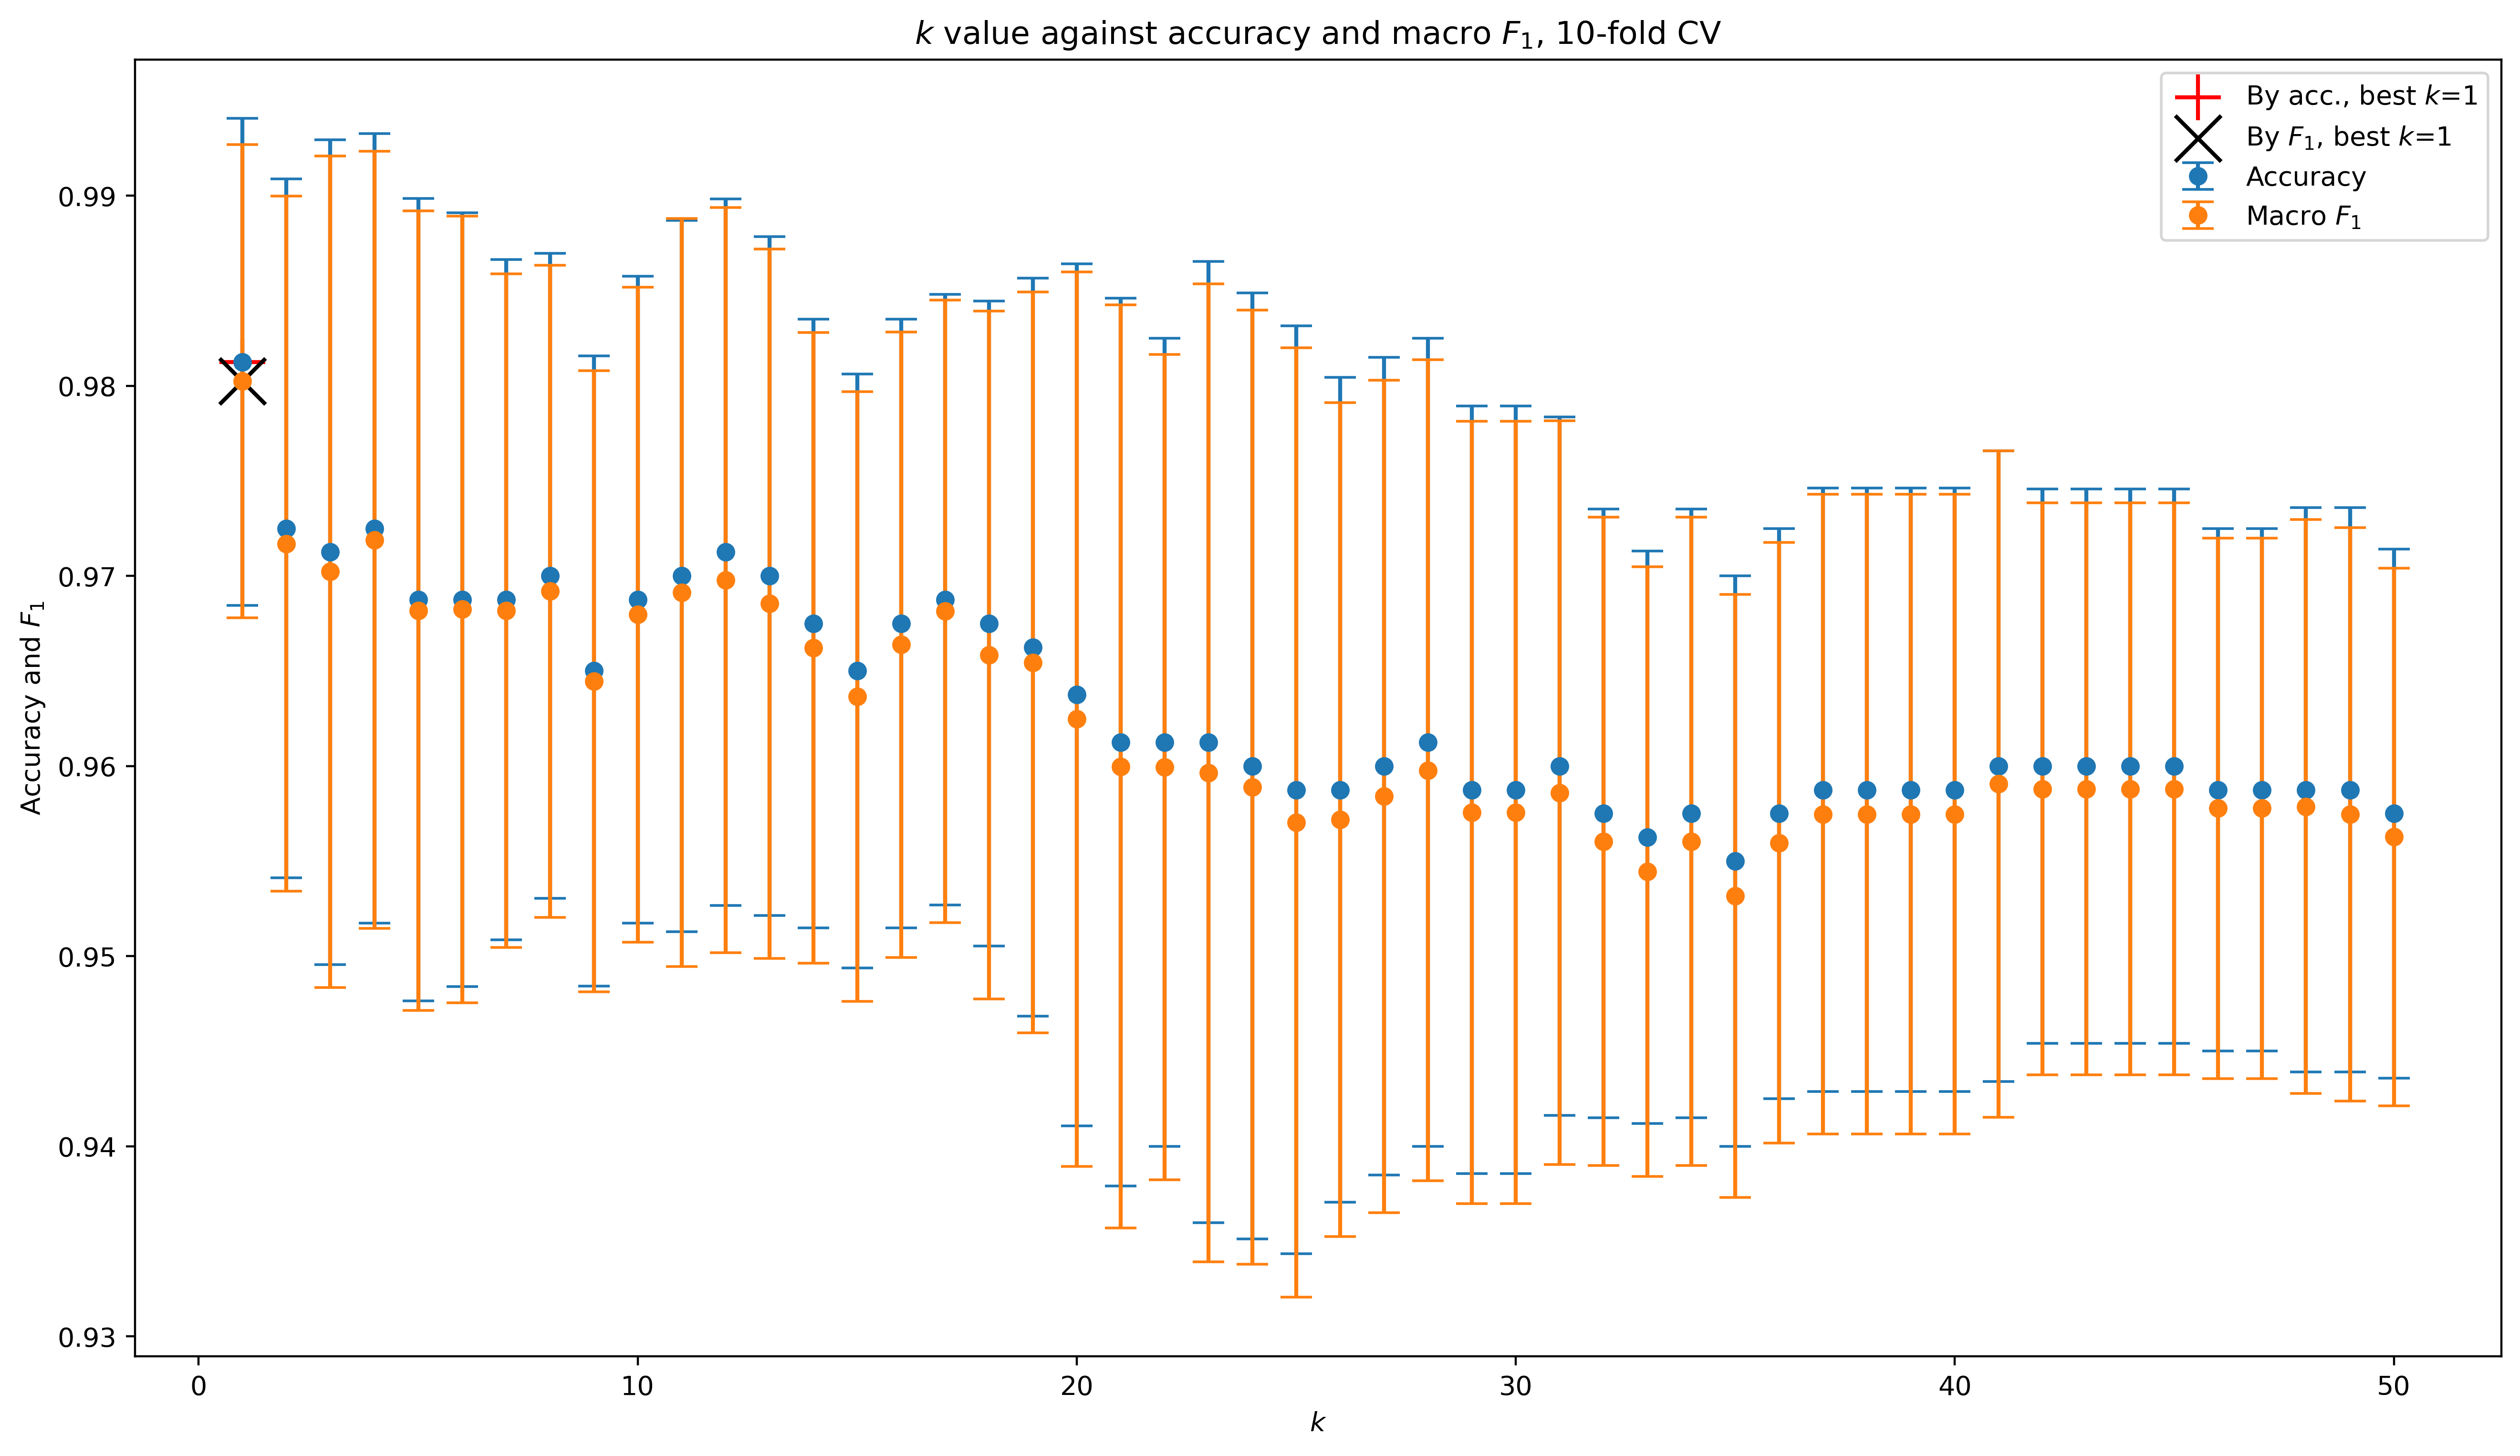

In [ ]:
%%time

NUMBER_OF_PARTITIONS = 10
K_RANGE_START = 1
K_RANGE_END = 51
K_RANGE_STEP = 1

k_range = np.arange(K_RANGE_START, K_RANGE_END, K_RANGE_STEP)
shuffled_data, shuffled_labels = shuffle_data_and_labels(data, labels)

# again, extremely similar loop to exp 1, only different data splitting and another recorder metric
accuracies_const_k_test = np.array([])
f1_const_k_test = np.array([])

accuracy_stdevs_const_k_test = np.array([])
f1_stdevs_const_k_test = np.array([])

for i in tqdm(k_range):
    accuracies_test = np.array([])
    f1_test = np.array([])
    for j in np.arange(0, NUMBER_OF_PARTITIONS):
        train, test, train_labels, test_labels = shuffled_train_test_partition_split(
            shuffled_data,
            shuffled_labels,
            n_partitions=NUMBER_OF_PARTITIONS,
            partition_index=j,
        )
        found_labels_test = knn_classify(
            train, test, train_labels, k=i, metric="cosine"
        )
        accuracies_test = np.append(
            accuracies_test, find_accuracy(found_labels_test, test_labels)
        )
        f1_test = np.append(f1_test, find_f1_macro(found_labels_test, test_labels))
    accuracies_const_k_test = np.append(
        accuracies_const_k_test, np.mean(accuracies_test)
    )
    f1_const_k_test = np.append(f1_const_k_test, np.mean(f1_test))
    accuracy_stdevs_const_k_test = np.append(
        accuracy_stdevs_const_k_test, np.std(accuracies_test)
    )
    f1_stdevs_const_k_test = np.append(f1_stdevs_const_k_test, np.std(f1_test))
best_k_by_accuracy_index = np.argmax(accuracies_const_k_test)
best_k_by_f1_index = np.argmax(f1_const_k_test)

best_k_by_accuracy = k_range[best_k_by_accuracy_index]
best_k_by_f1 = k_range[best_k_by_f1_index]

fig = plt.figure(figsize=(16, 9), dpi=400)
ax = fig.add_subplot(111)

ax.errorbar(
    k_range,
    accuracies_const_k_test,
    accuracy_stdevs_const_k_test,
    fmt="o",
    label="Accuracy",
    capsize=6,
)
ax.errorbar(
    k_range,
    f1_const_k_test,
    f1_stdevs_const_k_test,
    fmt="o",
    label=r"Macro $F_1$",
    capsize=6,
)

ax.scatter(
    best_k_by_accuracy,
    accuracies_const_k_test[best_k_by_accuracy_index],
    marker = '+',
    label=r"By acc., best $k$=" + str(best_k_by_accuracy),
    c="r",
    s=300,
    alpha=1,
)


ax.scatter(
    best_k_by_f1,
    f1_const_k_test[best_k_by_f1_index],
    marker = 'x',
    label=r"By $F_1$, best $k$=" + str(best_k_by_f1),
    c="k",
    s=300,
    alpha=1,
)

ax.set_title(
    r"$k$ value against accuracy and macro $F_1$, "
    + str(NUMBER_OF_PARTITIONS)
    + "-fold CV"
)
ax.set_xlabel(r"$k$")
ax.legend(loc="best")
ax.set_ylabel("Accuracy and $F_1$")


sample_error = 1 - accuracies_const_k_test[best_k_by_accuracy_index]
n_test = len(labels) / NUMBER_OF_PARTITIONS
z_p = 1.64
a = z_p * np.sqrt((sample_error * (1 - sample_error)) / n_test)

lower_bound = sample_error - a
if lower_bound<0:
    lower_bound = 0
upper_bound = sample_error + a
print(
    "With 90% confidence, the true error of the best performing classifier from exp 5 lies in the interval ["
    + str(lower_bound)
    + ", "
    + str(upper_bound)
    + "]."
)